In [1]:
from iexfinance.stocks import Stock 
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)

import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
import os
os.environ['IEX_SANDBOX'] = 'enable'

In [3]:
ticker = input("Input symbol: ")
companyInfo = Stock(ticker, token = 'sk_f3057482e64c4d19a8e43e3ad84c029e')
stockPrice = companyInfo.get_price()
print("Current stock price is: ", stockPrice)

Input symbol: GOOG
Current stock price is:  1464.7


In [4]:
print("View Historical Information for the current stock {}: ".format(ticker))
sy, sm, sd  = eval(input("Input start date as yyyy,m,d:"))
ey,em, ed = eval(input("Input end date as yyyy,m,d:"))

View Historical Information for the current stock GOOG: 
Input start date as yyyy,m,d:2018, 1,1 
Input end date as yyyy,m,d:2018, 12, 31 


In [5]:
start= datetime(sy, sm, sd)
end= datetime(ey, em, ed)
historicalPrices = get_historical_data (ticker, start, end, token = 'sk_f3057482e64c4d19a8e43e3ad84c029e')


In [13]:
stockHistoricals = pd.DataFrame(historicalPrices).T
stockHistoricals.head()

,open,high,low,close,volume
2018-01-02,1048.34,1066.94,1045.23,1065.00,1237564.0
2018-01-03,1064.31,1086.29,1063.21,1082.48,1430170.0
2018-01-04,1088.00,1093.57,1084.00,1086.40,1004605.0
2018-01-05,1094.00,1104.25,1092.00,1102.23,1279123.0
2018-01-08,1102.23,1111.27,1101.62,1106.94,1047603.0


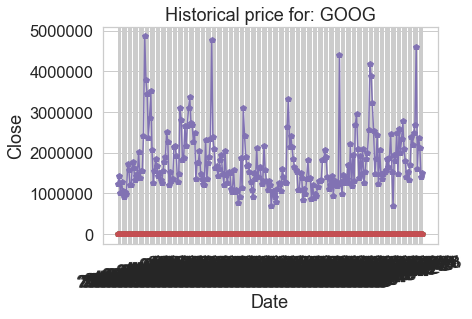

In [23]:
dformat = "%m/%d/%y"
fig, ax = plt.subplots()
ax.plot_date(stockHistoricals.index.values, stockHistoricals, 'p-')
ax.set(xlabel= 'Date', ylabel='Close')
ax.set_title('Historical price for: '+ ticker)
plt.xticks(rotation =15)
plt.show()

In [28]:
startingDate = (sy*10000) + (sm*100) +sd 
endingDate = (ey*10000) +(em*100)+ ed
filename = "HistoricalStockprices_" + ticker +"_from_" + str(startingDate)+ "_to_" + str(endingDate) + ".xlsx"
stockHistoricals.to_excel(filename)